In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['Ozoney1','Ozoney2','Ozoney3','year', 'month', 'day']]
Y1 = df['Ozone']

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=6)

In [43]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=6,
                                      max_features='log2',
                                      min_samples_split=3,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=6, max_features='log2',
                          min_samples_leaf=5, min_samples_split=3,
                          n_estimators=2000)

In [44]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8140753962850084

Score on test data: 0.6172275345951943

Root Mean Squared Error: 13.50859831799571

Overall model accuracy: 0.6172275345951943


In [45]:
test=data.loc['207':'259']
X=test[['Ozoney1','Ozoney2','Ozoney3','year', 'month', 'day']]
X

,Ozoney1,Ozoney2,Ozoney3,year,month,day
207,81.874286,23.741429,19.008571,2019,12,29
208,44.231429,24.824286,12.377143,2020,1,5
209,16.544286,33.828571,26.052857,2020,1,12
210,16.497143,30.060000,36.645714,2020,1,19
211,18.280000,31.908701,33.900000,2020,1,26
212,15.304286,14.922727,28.347143,2020,2,2
213,13.075714,42.105714,30.995000,2020,2,9
214,13.350000,47.765714,40.731429,2020,2,16
215,15.944286,32.580000,52.620000,2020,2,23
216,12.685714,34.004286,61.414286,2020,3,1


In [46]:
predict=grad_boost.predict(X)

In [47]:
predict

array([36.05930081, 30.55420783, 33.60619673, 30.56644557, 32.58837886,
       31.04734713, 32.42733473, 30.27827706, 26.44587608, 28.15794443,
       27.44860936, 33.74303832, 51.7659207 , 53.06386603, 53.77641547,
       39.15997526, 37.99908038, 55.25498477, 61.92401653, 56.90316451,
       52.74835975, 45.21977139, 62.03051448, 47.06182835, 40.78627282,
       42.49804001, 39.56647485, 29.80072874, 30.17575766, 32.82195219,
       34.29734572, 32.28476886, 32.48789025, 30.26934776, 31.86129527,
       36.12878483, 36.23903677, 36.243992  , 35.31976719, 33.92311534,
       33.41019342, 35.46992211, 39.25150155, 42.04388982, 39.5375117 ,
       39.90197496, 41.06733376, 36.72177267, 42.5302705 , 33.40867495,
       35.26403446, 41.74568271, 45.52485906])

In [48]:
dates=data.loc['207':'259','From Date']

In [49]:
X['From Date']=dates.values

In [50]:
X.columns

Index(['Ozoney1', 'Ozoney2', 'Ozoney3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [51]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [52]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [53]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [54]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

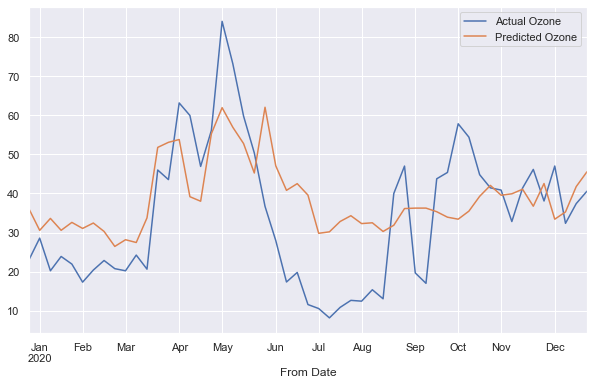

In [55]:
test['Ozone'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted Ozone')

In [56]:
np.sqrt(mean_squared_error(test['Ozone'],X['pred']))

14.262929998232675

In [57]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 10.772256466085324
MSE: 182.48222851695652
RMSE: 13.50859831799571
R-Squared: 0.6172275345951943


In [58]:
mae = metrics.mean_absolute_error(test['Ozone'],X['pred'])
mse = metrics.mean_squared_error(test['Ozone'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['Ozone'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 12.164022515359054
MSE: 203.43117213448554
RMSE: 14.262929998232675
R-Squared: 0.3360270936939027


In [59]:
import pickle
filename = 'Ozone_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [60]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.6172275345951943


# 3rd plot

In [61]:
testcase = pd.DataFrame()

In [62]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [63]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [64]:
testcase

,test,pred,Corrected
99,38.187143,39.890372,26.381774
207,23.017143,36.059301,22.550702
164,12.685714,49.061300,35.552702
157,16.544286,32.105034,18.596435
84,24.952857,27.821926,14.313327
158,16.497143,28.734429,15.225831
61,56.194286,63.071178,49.562580
134,22.034286,29.447737,15.939139
30,44.411429,32.482473,45.991071
4,49.721429,42.300225,55.808823


In [65]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [66]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8513768282999715

In [67]:
test2020=pd.DataFrame()

In [68]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [69]:
test2020.index=test.index

In [70]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

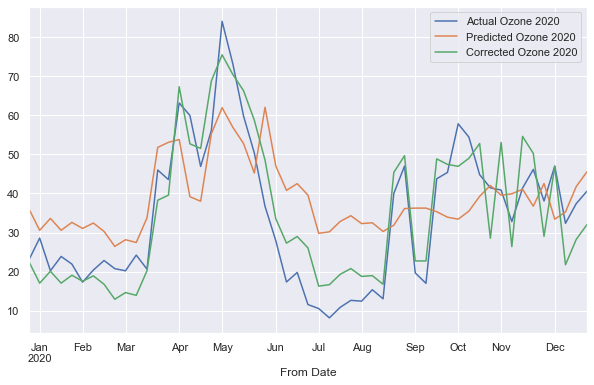

In [71]:
test2020['test'].plot(legend=True, label='Actual Ozone 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted Ozone 2020')
test2020["Corrected"].plot(legend=True, label='Corrected Ozone 2020')

In [72]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8148176456812767